# Introduction <a id="top"></a>

**Acme.ai** is a company that uses artificial intelligence technology to create interactive experiences that allow users to converse with historical figures and gain valuable insights into their lives.  

The analysis is based on key metrics that reflect user engagement and platform performance:

## Data Collection and Cleaning

In [2]:
# Importing needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns # for statistical graphic visualisation
import matplotlib.pyplot as plt # for visualisation

#### Set and Reset maximum rows:

In [4]:
# pd.set_option('display.max_rows', None)

In [7]:
# pd.reset_option('display.max_rows')

#### Load the data

In [14]:
active_users = pd.read_csv("active_users.csv", skiprows=6, delimiter=";", usecols=[0, 1], names=["Nth Day", "Active Users"])
landing_page_visitors = pd.read_csv("landing_page_visitors.csv", skiprows=6, delimiter=";", usecols=[0, 1], names=["Nth Day", "Visitors"])
subscription_churn = pd.read_csv("subscriptions_churn.csv")
subscription_conversion =  pd.read_csv("subscriptions_conversion.csv")

In [16]:
# Checking the data
print(active_users.head())
print(landing_page_visitors.head())
print(subscription_churn.head())
print(subscription_conversion.head())

                  Nth Day  Active Users
0  # Start date: 20230101           NaN
1    # End date: 20250306           NaN
2                 Nth day  Active users
3                       0           102
4                       1           119
                  Nth Day      Visitors
0  # Start date: 20230101           NaN
1    # End date: 20250306           NaN
2  # Start date: 20230101           NaN
3    # End date: 20250306           NaN
4                 Nth day  Active users
  Report Date  Actives  Churned Actives  Churn Rate
0  2022-08-13      0.0              0.0         0.0
1  2022-08-14      0.0              0.0         0.0
2  2022-08-15      0.0              0.0         0.0
3  2022-08-16      0.0              0.0         0.0
4  2022-08-17      0.0              0.0         0.0
  Report Date  New Customers  Paying Customers (3 days)  \
0  2022-08-31            0.0                        0.0   
1  2022-09-30            0.0                        0.0   
2  2022-10-31            0.0   

#### Start Date

In [19]:
start_date = active_users["Nth Day"].str.extract(r"#\s*Start date:\s*(\d{8})").dropna()
start_date = pd.to_datetime(start_date[0], format='%Y%m%d')
start_date = start_date.iloc[0]
start_date

Timestamp('2023-01-01 00:00:00')

#### End Date

In [22]:
end_date = active_users["Nth Day"].str.extract(r"#\s*End date:\s*(\d{8})").dropna()
end_date = pd.to_datetime(end_date[0], format='%Y%m%d')
end_date = end_date.iloc[0]
end_date

Timestamp('2025-03-06 00:00:00')

In [24]:
active_users = active_users[active_users["Nth Day"].str.match(r"^\d")]
active_users.head()

,Nth Day,Active Users
3,0,102
4,1,119
5,2,84
6,3,99
7,4,94


#### Active landing visitors

In [27]:
# check for  Null values
landing_page_visitors[landing_page_visitors["Visitors"].isna()]

,Nth Day,Visitors
0,# Start date: 20230101,NaN
1,# End date: 20250306,NaN
2,# Start date: 20230101,NaN
3,# End date: 20250306,NaN
801,NaN,NaN


#### Finding Index of New and Active Visitors

In [30]:
# Active visitors Index
visitors_index_active = landing_page_visitors[landing_page_visitors["Visitors"].fillna("").str.contains(r"Active.*")]
visitors_index_active = visitors_index_active.index[0]
visitors_index_active

4

In [32]:
# New visitors Index
visitors_index_new = landing_page_visitors[landing_page_visitors["Visitors"].fillna("").str.contains(r"New.*")]
visitors_index_new = visitors_index_new.index[0]
visitors_index_new

802

#### Active landing visitors

In [35]:
active_landing_visitors = pd.DataFrame(landing_page_visitors[visitors_index_active  : visitors_index_new])
active_landing_visitors.head()

,Nth Day,Visitors
4,Nth day,Active users
5,0,0
6,1,0
7,2,0
8,3,0


#### New landing visitors

In [38]:
new_landing_visitors = pd.DataFrame(landing_page_visitors[visitors_index_new  : ])
new_landing_visitors.head()

,Nth Day,Visitors
802,Nth day,New users
803,0,0
804,1,0
805,2,0
806,3,0


#### Handling Null values

In [41]:
active_users = active_users.dropna(subset=["Nth Day"])
active_landing_visitors = active_landing_visitors.dropna(subset=["Nth Day"])
new_landing_visitors = new_landing_visitors.dropna(subset=["Nth Day"])

In [43]:
active_landing_visitors = active_landing_visitors[active_landing_visitors["Nth Day"].str.match(r"^\d")]
new_landing_visitors = new_landing_visitors[new_landing_visitors["Nth Day"].str.match(r"^\d")]

## [Go to Top](#top)

## Describtive Analysis

In [47]:
active_users.describe()

,Nth Day,Active Users
count,796,796
unique,796,569
top,0,330
freq,1,6


In [49]:
active_landing_visitors.describe()

,Nth Day,Visitors
count,796,796
unique,796,451
top,0,0
freq,1,22


In [51]:
new_landing_visitors.describe()

,Nth Day,Visitors
count,796,796
unique,796,432
top,0,0
freq,1,22


In [53]:
subscription_churn.describe()

,Actives,Churned Actives,Churn Rate
count,937.000000,937.000000,937.000000
mean,453.769570,2.776779,0.533806
std,254.297486,2.828914,0.811871
min,0.000000,0.000000,0.000000
25%,356.932971,0.000000,0.000000
50%,483.318545,2.169192,0.419163
75%,622.528501,4.275575,0.753098
max,1022.607871,18.051414,18.978924


In [55]:
subscription_conversion.describe()

,New Customers,Paying Customers (3 days),Conversion Rate (3 days)
count,32.000000,32.000000,32.000000
mean,8061.321073,62.512495,0.594019
std,6932.118737,76.094610,0.519974
min,0.000000,0.000000,0.000000
25%,3943.385738,10.459372,0.345585
50%,6482.521810,29.554735,0.416652
75%,11118.254623,84.926343,0.763153
max,26033.912464,271.472623,2.492441


#### Framing the Nth day date

In [58]:
# Nth Day to numeric
active_users["Nth Day"] = pd.to_numeric(active_users["Nth Day"])
active_landing_visitors["Nth Day"] = pd.to_numeric(active_landing_visitors["Nth Day"])
new_landing_visitors["Nth Day"] = pd.to_numeric(new_landing_visitors["Nth Day"])

In [60]:
# Date conversion with Nth day
active_users["Nth day_date"] = start_date + pd.to_timedelta(active_users["Nth Day"], unit='D')
active_landing_visitors["Nth day_date"] = start_date + pd.to_timedelta(active_landing_visitors["Nth Day"], unit='D')
new_landing_visitors["Nth day_date"] = start_date + pd.to_timedelta(new_landing_visitors["Nth Day"], unit='D')

#### Merge "active_users", "active and new landing visitors" table with "Nth day_date":

In [63]:
merged_data = active_users.merge(active_landing_visitors, on="Nth Day", how="left", suffixes=('_active_users', '_active_visitors'))
merged_data = merged_data.merge(new_landing_visitors, on="Nth Day", how="left", suffixes=('', '_new_visitors'))

In [65]:
merged_data = merged_data.drop(columns = ["Nth day_date_active_users","Nth day_date_active_visitors"])

In [67]:
# Renaming columns
merged_data = merged_data.rename(columns = {"Visitors_new_visitors" : "new_visitors" , "Visitors" : "active_visitors"})

In [69]:
# Convert columns to datetime format
merged_data["Nth day_date"] = pd.to_datetime(merged_data["Nth day_date"])
subscription_churn["Report Date"] = pd.to_datetime(subscription_churn["Report Date"])
subscription_conversion["Report Date"] = pd.to_datetime(subscription_conversion["Report Date"])

In [71]:
# Filter only data between "start date" and " End date":
merged_data = merged_data[(merged_data["Nth day_date"].between(start_date,end_date))]
subscription_conversion = subscription_conversion[(subscription_conversion["Report Date"].between(start_date,end_date))]

#### Merge "merged_data" with "Subscription churn" table:

In [74]:
merged_data["active_visitors"] = pd.to_numeric(merged_data["active_visitors"])
merged_data["new_visitors"] = pd.to_numeric(merged_data["new_visitors"])

In [76]:
merged_churn = pd.merge(
    merged_data,
    subscription_churn,
    left_on="Nth day_date", 
    right_on="Report Date",
    how="left"
)

In [78]:
merged_churn["visitors"] = merged_data[["active_visitors","new_visitors"]].sum(axis = 1)

In [80]:
# New row with year and month:
merged_churn["year_month"] = merged_churn["Nth day_date"].dt.to_period("M")
subscription_conversion["year_month"] = subscription_conversion["Report Date"].dt.to_period("M")

In [82]:
merged_churn

,Nth Day,Active Users,active_visitors,new_visitors,Nth day_date,Report Date,Actives,Churned Actives,Churn Rate,visitors,year_month
0,0,102,0,0,2023-01-01,2023-01-01,0.000000,0.000000,0.000000,0,2023-01
1,1,119,0,0,2023-01-02,2023-01-02,0.000000,0.000000,0.000000,0,2023-01
2,2,84,0,0,2023-01-03,2023-01-03,0.000000,0.000000,0.000000,0,2023-01
3,3,99,0,0,2023-01-04,2023-01-04,0.000000,0.000000,0.000000,0,2023-01
4,4,94,0,0,2023-01-05,2023-01-05,0.000000,0.000000,0.000000,0,2023-01
...,...,...,...,...,...,...,...,...,...,...,...
791,791,205,186,169,2025-03-02,2025-03-02,311.232965,0.942837,0.332191,355,2025-03
792,792,211,351,328,2025-03-03,2025-03-03,287.779170,0.955330,0.370254,679,2025-03
793,793,293,369,345,2025-03-04,2025-03-04,279.804248,0.000000,0.000000,714,2025-03
794,794,270,283,257,2025-03-05,2025-03-05,283.193302,2.036480,0.708726,540,2025-03


### New visiotrs across the week

**The day with the highest number of new visitors is 'Wednesday' with more new visitors comapared to other days of the week.**

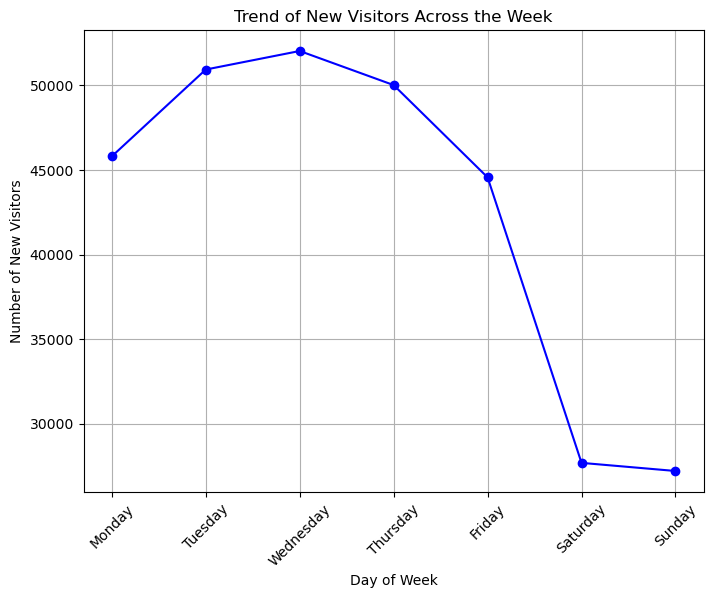

In [85]:
week_day = merged_churn.copy()
week_day["Day_of_week"] = week_day["Nth day_date"].dt.dayofweek

# Group by "Day_of_week" and sum up the "new_visitors" for each day
weekly_new_visitors = week_day.groupby("Day_of_week")["new_visitors"].sum()

# A list of day names
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# the day of the week with the highest number of new visitors
max_day = weekly_new_visitors.idxmax()
max_visitors = weekly_new_visitors.max()

from IPython.display import display, Markdown

display(Markdown(f"**The day with the highest number of new visitors is '{day_names[max_day]}' with more new visitors comapared to other days of the week.**"))


# Plot the trend of new visitors over the days of the week
plt.figure(figsize=(8, 6))
plt.plot(weekly_new_visitors.index, weekly_new_visitors.values, marker="o", linestyle="-", color="b")
plt.xticks(weekly_new_visitors.index, day_names, rotation=45)  # Set x-ticks to day names
plt.title("Trend of New Visitors Across the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of New Visitors")
plt.grid(True)
plt.show()

In [86]:
merged_churn["Churned Actives"] = merged_churn["Churned Actives"].round().astype("Int64")
merged_churn["Actives"] = merged_churn["Actives"].round().astype("Int64")
merged_churn["Churn Rate"] = merged_churn["Churn Rate"].round(2)

In [89]:
churn = merged_churn.groupby("year_month")[["new_visitors","Actives",
                                                   "Churned Actives"]].sum().reset_index()
churn["churn_rate_calc"] = ((churn["Churned Actives"] / churn["Actives"]) * 100).round(2)
churn.head()

,year_month,new_visitors,Actives,Churned Actives,churn_rate_calc
0,2023-01,5090,2738,27,0.99
1,2023-02,15756,11855,213,1.8
2,2023-03,17374,13466,168,1.25
3,2023-04,13017,13441,126,0.94
4,2023-05,14481,14396,84,0.58


In [91]:
subscription_conversion["conversion_rate"] = (subscription_conversion["Conversion Rate (3 days)"] * 10).round(2)

In [93]:
subscription_conversion["paying_customers"] = (subscription_conversion["Paying Customers (3 days)"] *10).round().astype("int64")

In [95]:
subscription_conversion["New Customers"] = subscription_conversion["New Customers"].round().astype("Int64")

In [97]:
conversion = subscription_conversion.drop(columns = ["Paying Customers (3 days)","Conversion Rate (3 days)"])
conversion.head()

,Report Date,New Customers,year_month,conversion_rate,paying_customers
5,2023-01-31,23629,2023-01,10.62,2659
6,2023-02-28,26034,2023-02,11.63,2295
7,2023-03-31,20466,2023-03,6.37,1212
8,2023-04-30,10759,2023-04,6.59,765
9,2023-05-31,13032,2023-05,5.55,943


In [99]:
merge_churn_conversion = pd.merge(churn, conversion, how = "inner", on="year_month")

In [101]:
merge_churn_conversion.head()

,year_month,new_visitors,Actives,Churned Actives,churn_rate_calc,Report Date,New Customers,conversion_rate,paying_customers
0,2023-01,5090,2738,27,0.99,2023-01-31,23629,10.62,2659
1,2023-02,15756,11855,213,1.8,2023-02-28,26034,11.63,2295
2,2023-03,17374,13466,168,1.25,2023-03-31,20466,6.37,1212
3,2023-04,13017,13441,126,0.94,2023-04-30,10759,6.59,765
4,2023-05,14481,14396,84,0.58,2023-05-31,13032,5.55,943


<Figure size 1000x800 with 0 Axes>

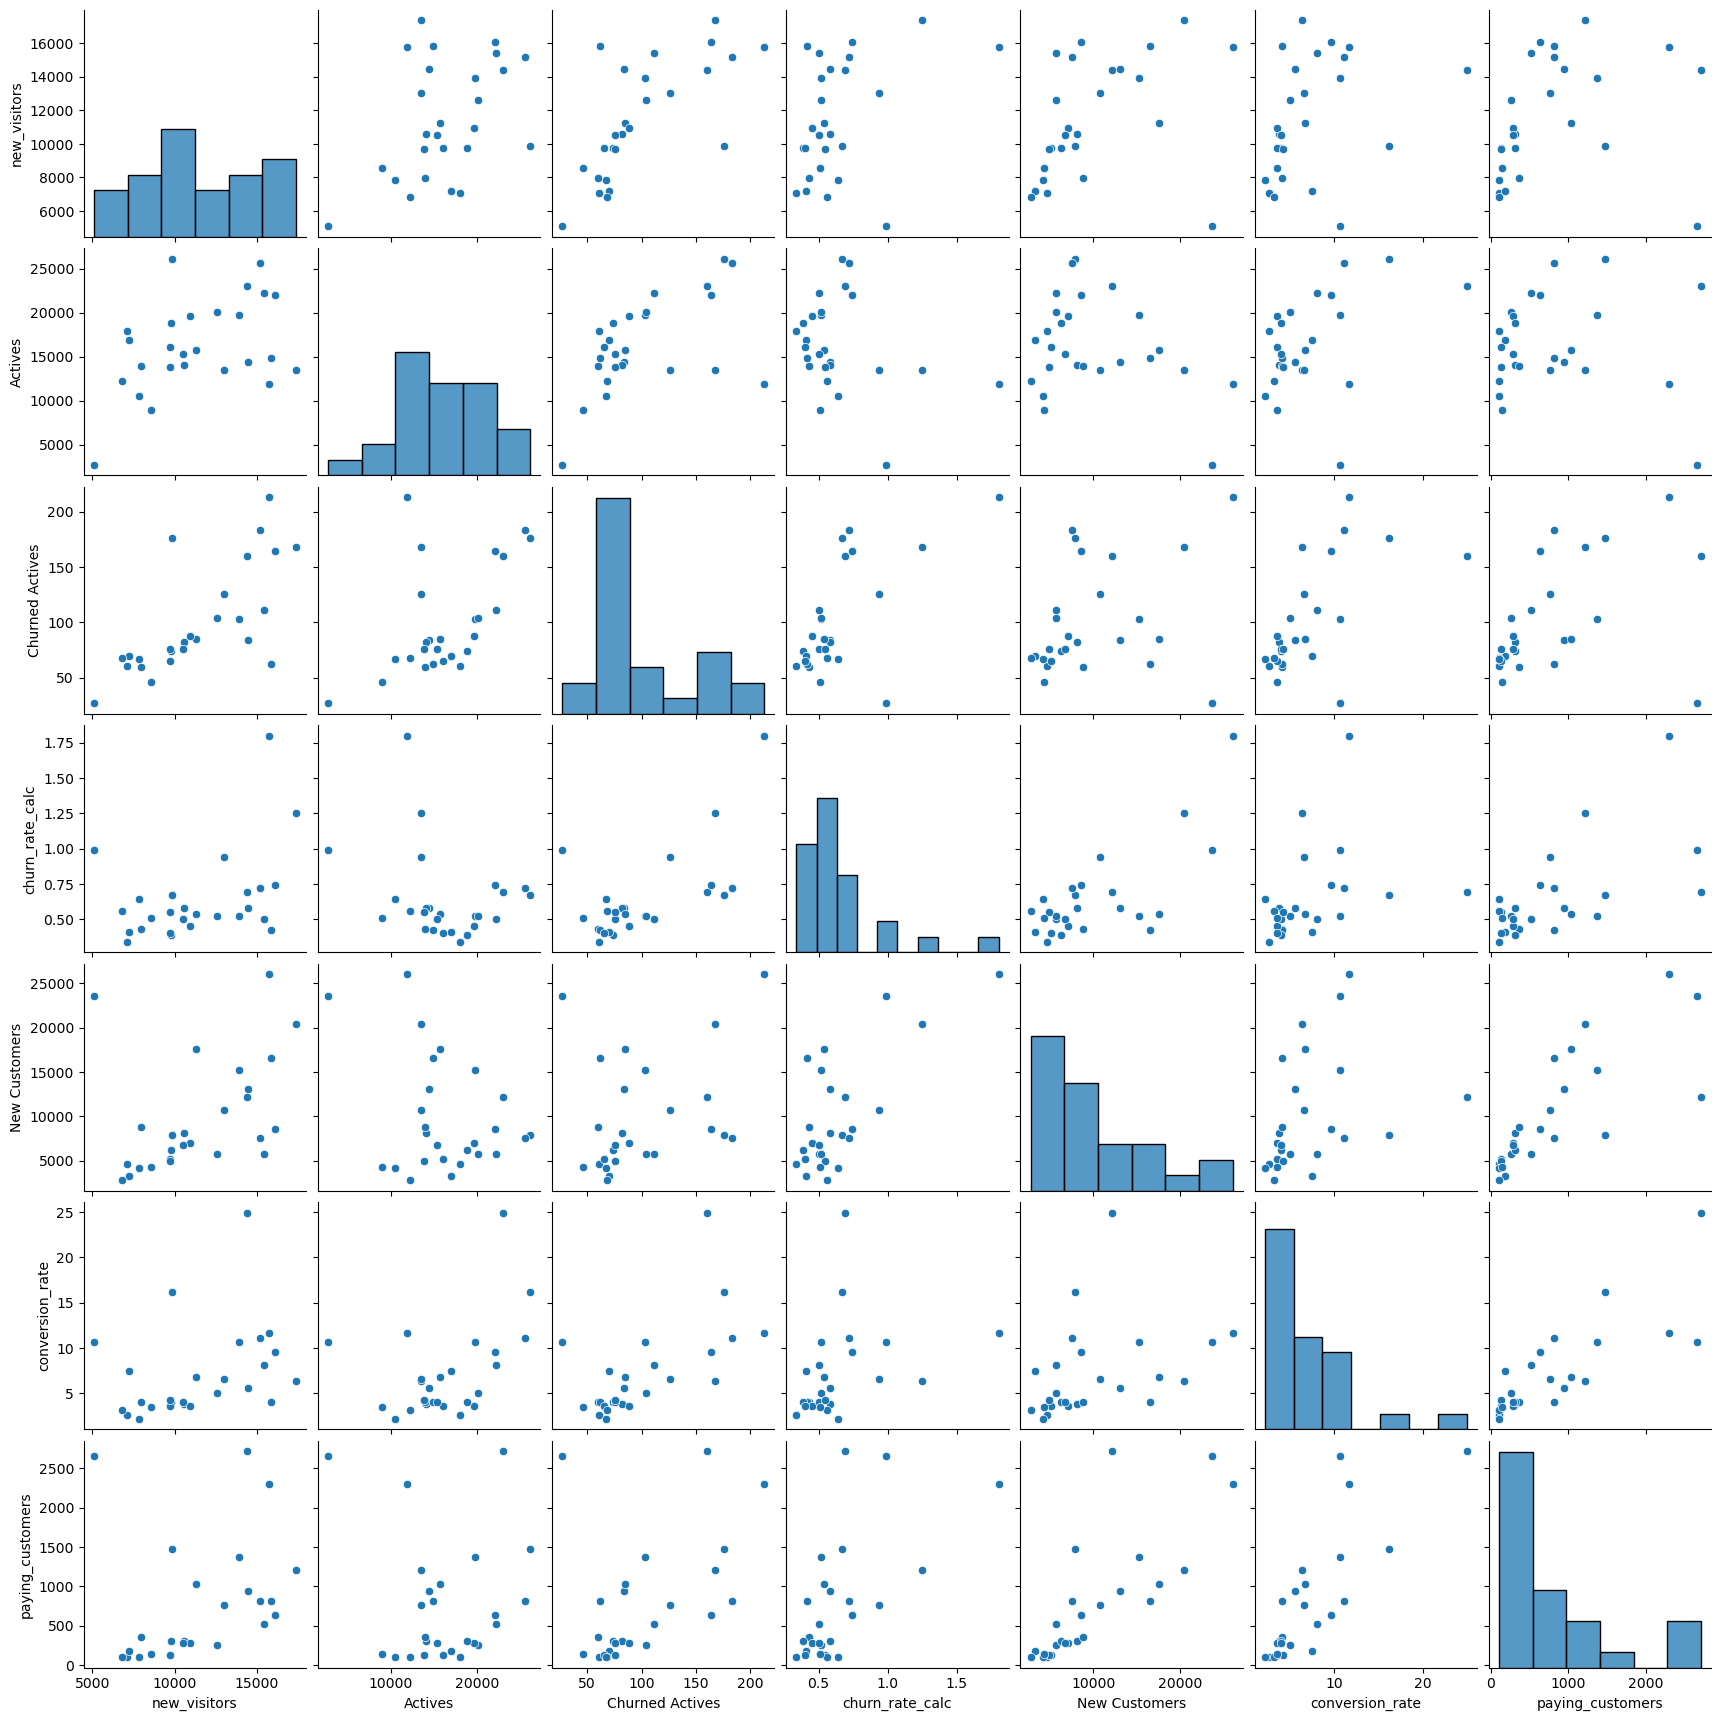

In [103]:
plt.figure(figsize = (10,8))
sns.pairplot(merge_churn_conversion)
plt.show()

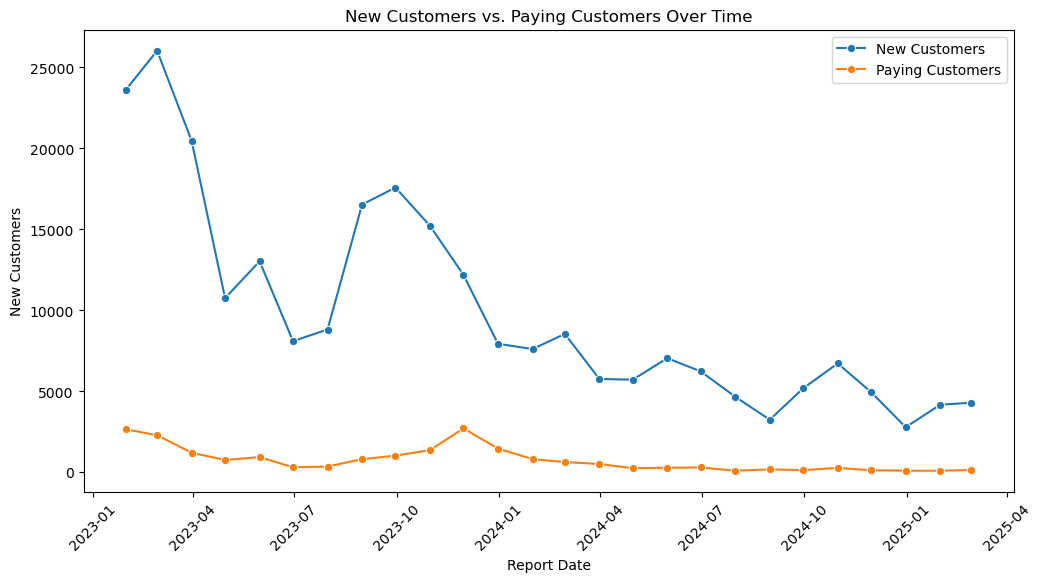

In [104]:
plt.figure(figsize=(12,6))

sns.lineplot(x="Report Date", y="New Customers", data=merge_churn_conversion, label="New Customers", marker="o")
sns.lineplot(x="Report Date", y="paying_customers", data=merge_churn_conversion, label="Paying Customers", marker="o")

plt.xticks(rotation=45)
plt.title("New Customers vs. Paying Customers Over Time")
plt.legend()
plt.show()

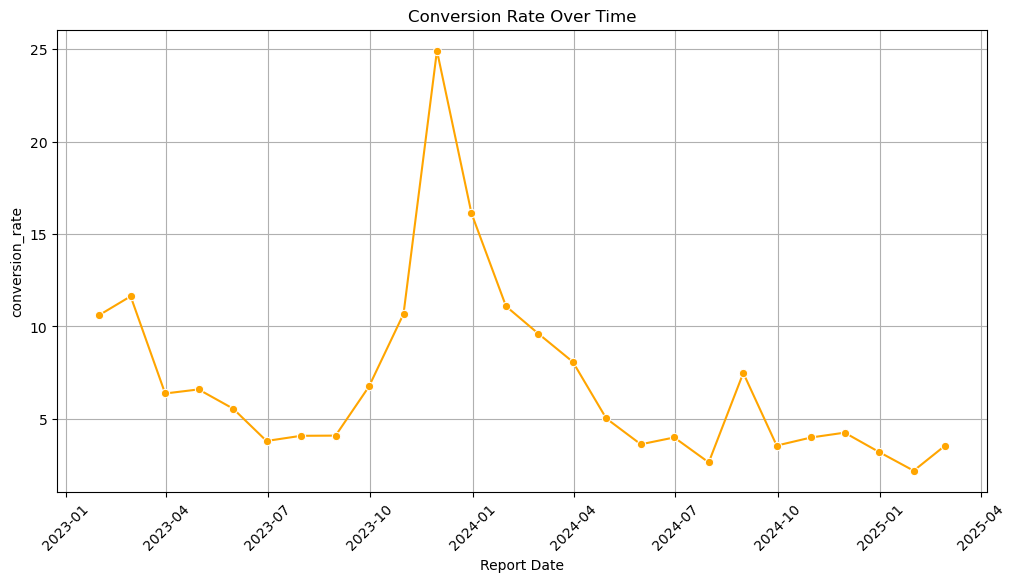

In [105]:
plt.figure(figsize=(12,6))

sns.lineplot(x="Report Date", y="conversion_rate", data=merge_churn_conversion, label="Conversion Rate", marker="o", color = "orange")

plt.xticks(rotation=45)
plt.title("Conversion Rate Over Time")
plt.grid()
plt.legend([],[], frameon=False)  
plt.show()

**Insight**:  
- The New Customers count declined significantly from early 2023 to  2025, reflecting a decrease in customer acquisition effectiveness.
- Similarly, Paying Customers had a downward trend in the latter half of 2023 to 2025.
- The conversion dropped dramatically aligning with the decline in Paying Customers, indicating that fewer new customers were successfully converted into paying customers as time progressed.

**Recommendations**:  
Understanding the reason for user's dis-engagement and undertaking necessary steps, like:
- Customer Retention and Engagement strategies like personalized offers or loyalty programs.
- Marketing Campaigns and Acquisition programs to bring in new customers.

#### Correlation between variables:

In [108]:
numeric_columns = merge_churn_conversion.select_dtypes(include=['number']).columns

corr_merge = merge_churn_conversion[numeric_columns].corr()
corr_merge

,new_visitors,Actives,Churned Actives,churn_rate_calc,New Customers,conversion_rate,paying_customers
new_visitors,1.000000,0.433219,0.706908,0.392730,0.405979,0.340078,0.299701
Actives,0.433219,1.000000,0.543776,-0.274292,-0.321821,0.429917,-0.046053
Churned Actives,0.706908,0.543776,1.000000,0.638515,0.323236,0.628424,0.458379
churn_rate_calc,0.392730,-0.274292,0.638515,1.000000,0.722060,0.354432,0.631984
New Customers,0.405979,-0.321821,0.323236,0.722060,1.000000,0.359173,0.797020
conversion_rate,0.340078,0.429917,0.628424,0.354432,0.359173,1.000000,0.809230
paying_customers,0.299701,-0.046053,0.458379,0.631984,0.797020,0.809230,1.000000


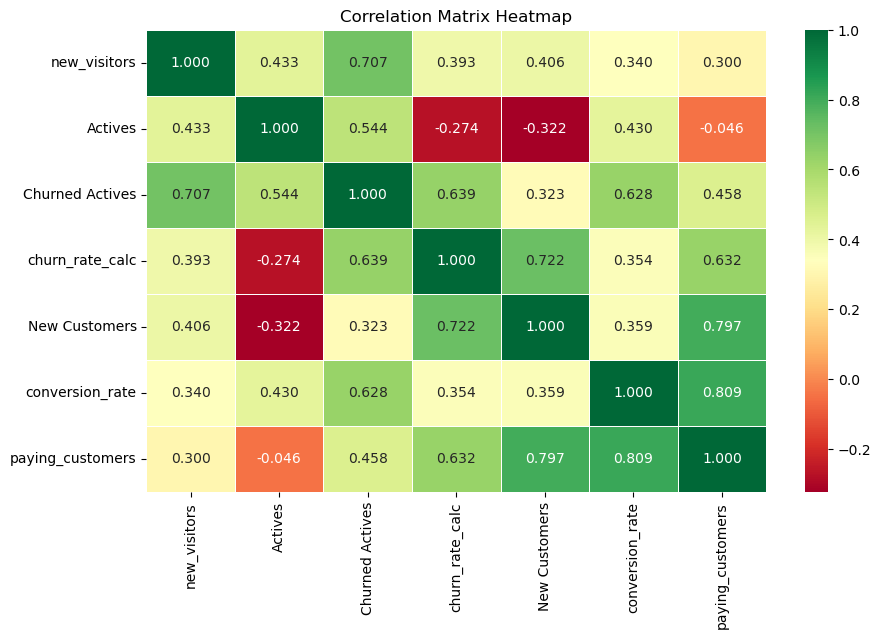

In [109]:
# set figure size
plt.figure(figsize=(10, 6))

# Create a heatmap using seaborn
sns.heatmap(corr_merge, annot=True, cmap="RdYlGn", fmt=".3f", linewidths=0.5)

# Titles and labels
plt.title("Correlation Matrix Heatmap")
plt.show()

**Strong Correlation**:  
New Customers & Paying Customers: Correlation of 0.80, indicating a strong positive relationship. As the number of customers increases, paying customers also significantly rise.

**Moderate Correlation**:  
Churn Rate & Paying Customers: Correlation of 0.63, showing a moderate positive relationship. 
A higher churn rate is somewhat linked to an increase in paying customers.

Possible reasons:
- The company is focusing on acquiring new customers to increase the payin customers and conversion rate to replace churned ones.
-  It could also be influenced by other factors such as product improvements, pricing changes, or targeted marketing. 

**Conclusion**:  
The strong correlation between new customers and paying customers remains the most impactful. However, the moderate correlation between churn rate and paying customers suggests that higher churn might be driving the need to focus more on paying customers. 
Further analysis to better understand this relationship and determine how to reduce churn while still acquiring the number of customers can help to increase the retention rate.

#### Feature Engineering:

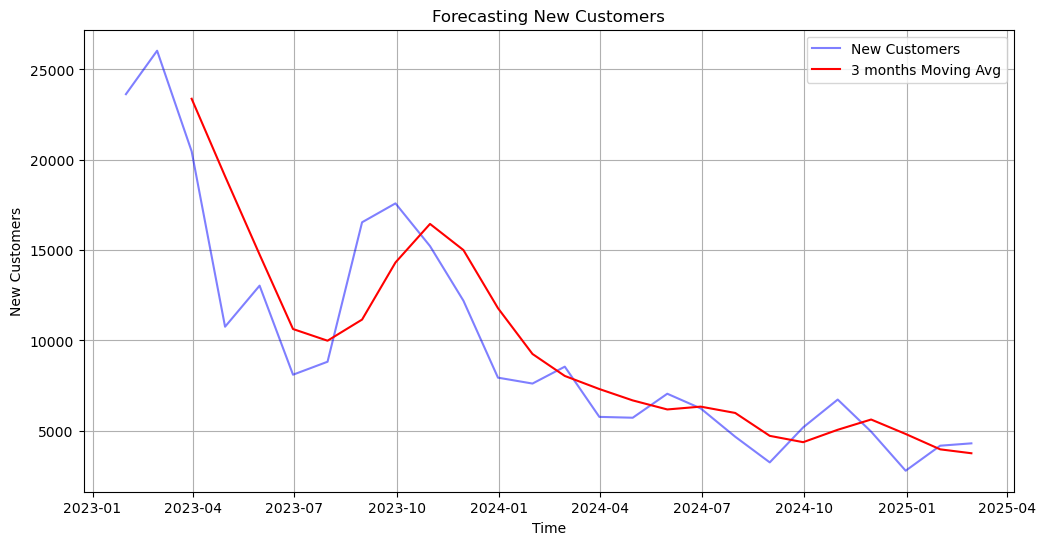

In [112]:
merge_churn_conversion["New_Customers_Change"] = merge_churn_conversion["New Customers"].rolling(window=3).mean().round()

plt.figure(figsize=(12, 6))

plt.plot(merge_churn_conversion["Report Date"], merge_churn_conversion["New Customers"], label="New Customers", color="blue", alpha=0.5)
plt.plot(merge_churn_conversion["Report Date"], merge_churn_conversion["New_Customers_Change"], label="3 months Moving Avg", color="red")
plt.xlabel("Time")
plt.ylabel("New Customers")
plt.title("Forecasting New Customers")
plt.legend()
plt.grid()
plt.show()

In [113]:
#Percentage Change in Paying Customers
merge_churn_conversion["Paying_Customers_Change"] = merge_churn_conversion["paying_customers"].pct_change()

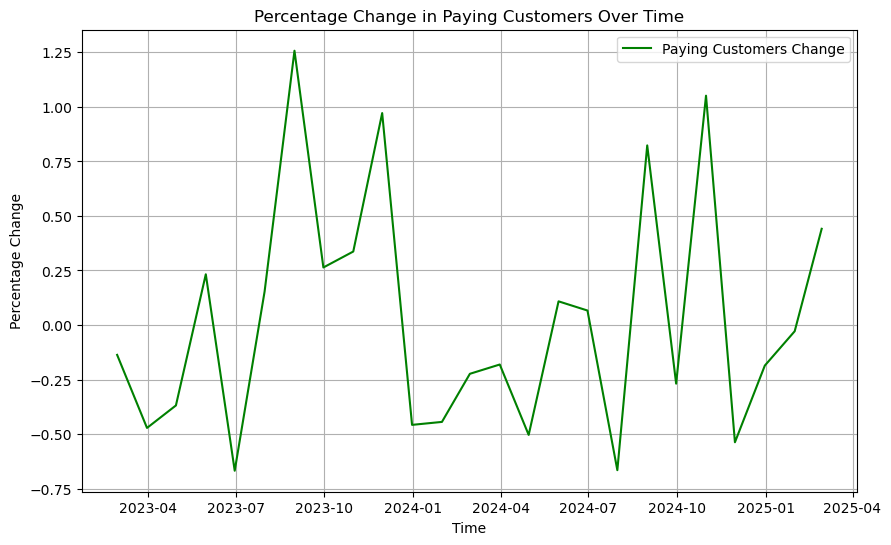

In [114]:
# Plotting Paying Customers Change
plt.figure(figsize=(10, 6))

plt.plot(merge_churn_conversion["Report Date"], merge_churn_conversion["Paying_Customers_Change"], label="Paying Customers Change", color="green")

plt.xlabel("Time")
plt.ylabel("Percentage Change")
plt.title("Percentage Change in Paying Customers Over Time")
plt.grid(True)
plt.legend()
plt.show()

**Insight:**  
1. New_Customers_Change:
Declining Trend: Looking at the New_Customers_Change column, we can observe a general decline in the number of new customers as the months progress. This suggests that fewer new customers are being acquired over time.

2. Paying_Customers_Change:
Rising Trend: On the other hand, the Paying_Customers_Change column shows more positive growth in the number of paying customers. This suggests that while the number of new customers is declining, the number of paying customers is rising, which could indicate that existing customers are converting to paying customers.

This forecast gives that the company focuses more on converting existing customers into paying ones, rather than focusing solely on acquiring new customers. 

**Recommendations:**  
A possible focus on conversion rates (getting existing/new customers to pay) rather than purely customer acquisition, causes this result. Increase in marketing campaigns and other factors to bring in more visitors can rise the customers and conversion rate.

## [Go to Top](#top)

## Deeper Analysis

#### Standardization of values

In [119]:
from sklearn.preprocessing import StandardScaler

# Select the columns to standardize
columns_to_standardize = ["new_visitors","Actives",
                          "Churned Actives","churn_rate_calc",
                          "New Customers","conversion_rate","paying_customers"]

# Initialize the StandardScaler
scaler = StandardScaler()

#Define the "merge_churn_conversion_scaled" variable
merge_churn_conversion_scaled = merge_churn_conversion.copy()

# Apply the scaler to the selected columns
merge_churn_conversion_scaled[columns_to_standardize] = scaler.fit_transform(merge_churn_conversion[columns_to_standardize])

# Check the standardized data
merge_churn_conversion_scaled.head()

,year_month,new_visitors,Actives,Churned Actives,churn_rate_calc,Report Date,New Customers,conversion_rate,paying_customers,New_Customers_Change,Paying_Customers_Change
0,2023-01,-1.869134,-2.629497,-1.539468,1.138272,2023-01-31,2.190216,0.724825,2.479655,NaN,NaN
1,2023-02,1.280247,-0.860067,2.385080,3.772559,2023-02-28,2.573806,0.930220,2.002374,NaN,-0.136894
2,2023-03,1.757998,-0.547404,1.435592,1.983846,2023-03-31,1.685727,-0.139459,0.582330,23376.0,-0.471895
3,2023-04,0.471494,-0.552256,0.549404,0.975662,2023-04-30,0.137492,-0.094719,-0.003782,19086.0,-0.368812
4,2023-05,0.903774,-0.366909,-0.336784,-0.195132,2023-05-31,0.500029,-0.306215,0.229614,14752.0,0.232680


#### Multiple Linear Regression

In [121]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define independent variables (X) and dependent variable (y)
X = merge_churn_conversion_scaled[["new_visitors","Actives",
                          "Churned Actives","churn_rate_calc",
                          "New Customers","conversion_rate"]]
y = merge_churn_conversion_scaled["paying_customers"]

# Add constant for intercept
X = sm.add_constant(X)

# Run the OLS regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       paying_customers   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     221.4
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.54e-16
Time:                        16:22:18   Log-Likelihood:                 18.510
No. Observations:                  26   AIC:                            -23.02
Df Residuals:                      19   BIC:                            -14.21
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.939e-18      0.027   2.

**Summary:** 

**R-squared (0.986):**
98.6% of the variation in the number of paying customers is explained by the combination of all the independent variables, indicating a very strong relationship.

**Key Coefficients:**
- New Customers (0.4515):
For each new customer acquired, the number of paying customers increases by 0.4515. This shows a strong positive and statistically significant relationship with paying customers, with a p-value of 0.000.

- Conversion Rate (0.7452):
Each unit increase in the conversion rate results in an increase of 0.7452 in paying customers. This also shows a significant and positive effect, with a p-value of 0.000, emphasizing the importance of conversion rate.

**Features for Future Modeling:**
New Customers (strong positive effect)
Conversion Rate (strong positive effect)

**Recommendation**:  
Focus on New Customers and Conversion Rate as key drivers of paying customers, given their significant positive relationships.

In [133]:
import scipy.stats as stats

# Correlation between New Customers and Paying Customers
correlation_1, p_value_1 = stats.pearsonr(merge_churn_conversion_scaled["New Customers"], merge_churn_conversion_scaled["paying_customers"])

# Correlation between Conversion Rate and Paying Customers
correlation_2, p_value_2 = stats.pearsonr(merge_churn_conversion_scaled["conversion_rate"], merge_churn_conversion_scaled["paying_customers"])


print("\nCorrelation between New Customers and Paying Customers:", correlation_1)
print("P-value:", p_value_1)

print("\nCorrelation between Conversion Rate and Paying Customers:", correlation_2)
print("P-value:", p_value_2)


Correlation between New Customers and Paying Customers: 0.7970199884068363
P-value: 1.0984229506387437e-06

Correlation between Conversion Rate and Paying Customers: 0.8092295469039603
P-value: 5.583034971089561e-07


**Insignt**: 
<u>*New Customers and Paying Customers*</u>

- Correlation Coefficient: 0.79 (strongly positive): This proves that the increase in the number of customers will consequently improve the paying customers.
P-value: 1.10e-06  (Less than the 0.05 significance level), which indicates the significant relation between the new customers and the paying customers.

<u>*Paying Customers and Conversion Rate*</u>

- Correlation between Conversion Rate and Paying Customers: 0.80: This proves that the increase in the number of paying customers will consequently improve the conversion rate.
P-value: 5.583034971089561e-07  (Less than the 0.05 significance level), which indicates the significant relation between the paying customers and the conversion rate.

**Conclusion:**  
Correlation between New Customers, Paying Customers and conversion Rate, indicates these 3 parameters are more significant and makes them the key features for further analysis and modelling.

### Hypothesis Analysis:
**Null Hypothesis (H₀):**
- The relationship between "new customers" and "paying customers" is not significant.

**Alternative Hypothesis (H₁):**
- The relationship between "new customers" and "paying customers" is significant.


**Conclusion**:  
<u>Correlation between New Customers and Paying Customers:</u> 0.79   
<u>P-value:</u> 1.0984229506387437e-06
- The p-value of 1.0984e-06 is very small (much less than the commonly used significance level of 0.05), indicating to reject the null hypothesis, indicating the relationship is statistically significant the evidence to suggest that an increase in the number of customers significantly increases the paying customers and in turn the conversion rate.

### Customer Acquisition and Its Effect on Paying Customers: A Linear Regression Model

 Regression Coefficient (Standardized): 0.581366
 Intercept (Standardized): 0.0000
 R-squared (Standardized): 0.9492


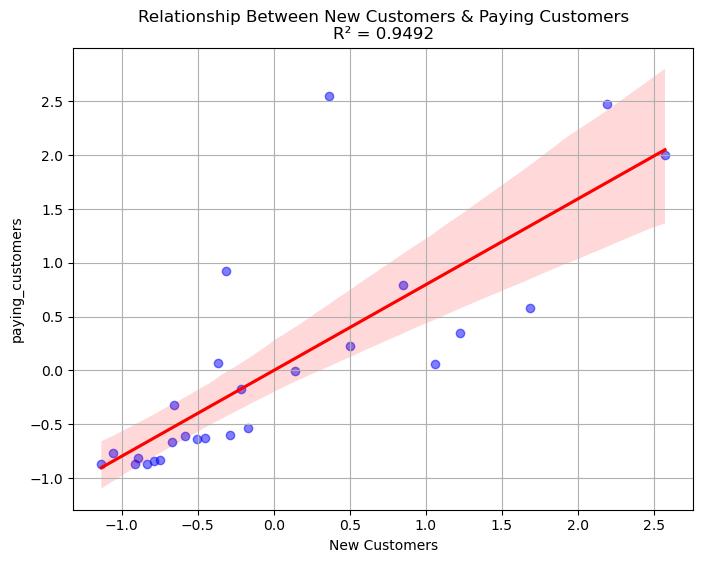

In [139]:
from sklearn.linear_model import LinearRegression

# Using the scaled data
X_scaled = merge_churn_conversion_scaled[["New Customers","conversion_rate"]].values  # Independent Variable (after scaling)
y_scaled = merge_churn_conversion_scaled["paying_customers"].values  # Dependent Variable

# Train the Linear Regression Model again on the standardized data
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_scaled)

# Regression Coefficients
print(f" Regression Coefficient (Standardized): {model_scaled.coef_[0]:.6f}")
print(f" Intercept (Standardized): {model_scaled.intercept_:.4f}")
print(f" R-squared (Standardized): {model_scaled.score(X_scaled, y_scaled):.4f}")

# Predictions after standardization
y_pred_scaled = model_scaled.predict(X_scaled)

# Visualize Results: Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x=merge_churn_conversion_scaled["New Customers"], y=merge_churn_conversion_scaled["paying_customers"], 
            scatter_kws={"color": "blue", "alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("New Customers")
plt.ylabel("paying_customers")
plt.title(f"Relationship Between New Customers & Paying Customers\nR² = {model_scaled.score(X_scaled, y_scaled):.4f}")
plt.grid(True)
plt.show()

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the training data
y_pred_scaled = model_scaled.predict(X_scaled)

# R-squared
r2 = r2_score(y_scaled, y_pred_scaled)
print(f" R-squared (Standardized): {r2:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_scaled, y_pred_scaled)
print(f" Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_scaled, y_pred_scaled)
print(f" Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")

 R-squared (Standardized): 0.9492
 Mean Absolute Error (MAE): 0.1593
 Mean Squared Error (MSE): 0.0508
 Root Mean Squared Error (RMSE): 0.2253


**Model Performance:**  
<u>R-squared:  </u>
The model explains 94.92% of the variance in the number of paying customers, which indicates that the independent variables (New Customers and Conversion Rate) are highly effective in predicting the number of paying customers.

<u>Regression Coefficients:  </u>
Regression Coefficient (Standardized) for New Customers:
For each unit increase in New Customers, the number of paying customers increases by 0.581366 (when the Conversion Rate is constant). 

<u>Regression Coefficient for Conversion Rate:  </u>
Similarly, for each unit increase in the Conversion Rate, the number of paying customers increases by 0.581366 (when the New Customers is constant). 

<u>Model Evaluation:  </u>
This is a relatively low error, indicating that the model performs well in terms of making predictions, not significantly large outliers and low prediction error.

**Recommendations:**  
The number of paying customers is strongly influenced by New Customers and Conversion Rate, highlighting the importance of these two factors.
- Improving Customer Acquisition and strategies to bring in more new customers.
- Optimizing Conversion Strategies to turn more visitors into paying customers and improve overall customer retention.

### Segmentation and Customer Analysis

#### Optimal Cluster Selection for Customer Analysis Using the Elbow Method

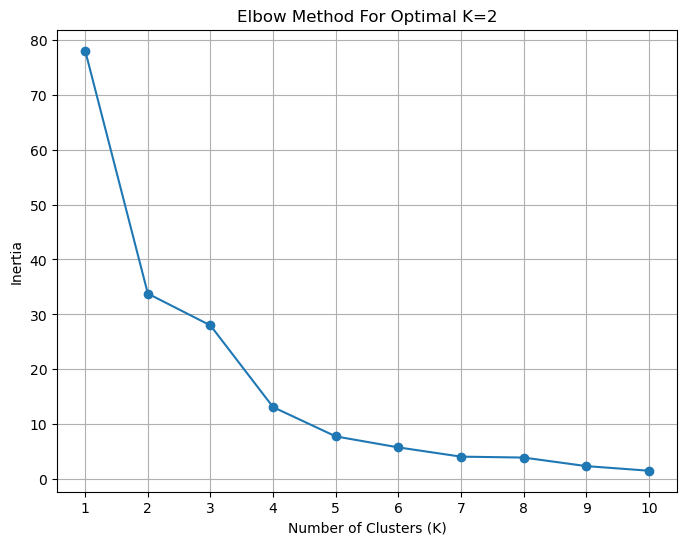

In [146]:
from sklearn.cluster import KMeans

# Supress the warning
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Selecting feattures for clustering
selected_features = ["New Customers", "paying_customers","conversion_rate"]
unsupervised_churn_conversion_scaled = merge_churn_conversion_scaled[selected_features]

# Determining the optimal number of clusters using the Elbow method
inertia = []  # To store the sum of squared distances (Inertia) for each K
range_k = range(1, 11)  # Trying K values from 1 to 10

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(unsupervised_churn_conversion_scaled)
    inertia.append(kmeans.inertia_)

# Find the optimal K using the elbow method
optimal_k = None
for i in range(1, len(inertia) - 1):
    if inertia[i-1] - inertia[i] > inertia[i] - inertia[i+1]:
        optimal_k = i + 1
        break

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_k, inertia, marker="o", linestyle="-")
plt.title(f"Elbow Method For Optimal K={optimal_k}")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(range_k)  # Ensure K values are clearly marked
plt.grid(True)  # grid for better readability
plt.show()

In [147]:
# Fit the KMeans model with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(unsupervised_churn_conversion_scaled)

# Get the centroids (from standardized data)
centroids_scaled = kmeans.cluster_centers_

# Create a DataFrame for the centroids
centroids_df = pd.DataFrame(centroids_scaled, columns=selected_features)

#### Exploring Customer Segmentation with PCA for Dimensionality Reduction

In [149]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(unsupervised_churn_conversion_scaled)

# Checking the explained variance ratio of the components
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')

# Create a separate DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA_Component_1', 'PCA_Component_2'])

Explained Variance Ratio: [0.77650173 0.21362627]


**Insight:**  
- PC1 explains about 77.65% of the variance in the data.
- PC2 explains about 21.36% of the variance.  
Together, they explain 99.01% of the total variance in the dataset.

In [151]:
from sklearn.cluster import KMeans

# Fit KMeans with optimal clusters on PCA-transformed data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_df)

# Assign cluster labels
pca_df['Cluster'] = kmeans.labels_

# Get cluster centroids from PCA-transformed data
centroids = kmeans.cluster_centers_

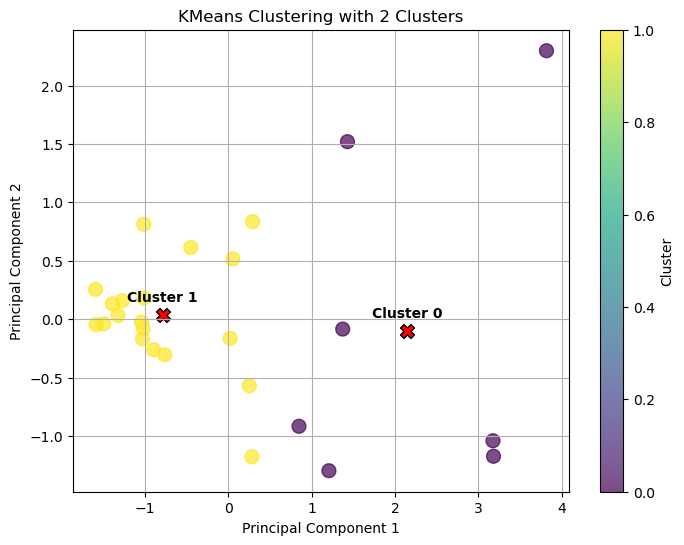

In [152]:
# Plot clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA_Component_1'], pca_df['PCA_Component_2'],
                      c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7, label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, edgecolors='black', label='Centroids')

# Annotate the centroids with cluster labels
for i, centroid in enumerate(centroids):
    plt.annotate(f"Cluster {i}", (centroid[0], centroid[1]), textcoords="offset points", xytext=(0, 10),
                 ha='center', color='black', fontsize=10, fontweight='bold')

# Add plot labels and title
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add color bar to show the cluster
plt.colorbar(scatter, label='Cluster')

# Show the plot
plt.grid(True)
plt.show()

In [153]:
pca_loadings = pd.DataFrame(pca.components_, columns=unsupervised_churn_conversion_scaled.columns, index=['PC1', 'PC2'])
print(pca_loadings.T)

                       PC1       PC2
New Customers     0.535273 -0.713780
paying_customers  0.649551  0.006008
conversion_rate   0.539969  0.700344


**PCA Components:**  
- PC1: This component is likely to represent a general trend where both New Customers and paying_customers are positively correlated. It captures more of the variability in New Customers and paying_customers.
- PC2: This component seems to capture the relationship between New Customers (negative correlation) and conversion_rate (positive correlation). It suggests a second dimension that might highlight contrasts between the two.

**Conclusion:**  
PC1 represents a general trend between New Customers and paying_customers, while PC2 highlights a contrast between New Customers and conversion_rate.

**Insight:**
- Cluster 0: High engaged customers with high conversion rate.
These customers show strong purchasing behaviors and 
they seem to be already benefiting from the product or service, indicating that they are active and responsive.
- Cluster 1: Low engaged customers with low conversion rate.
These users may have shown initial interest but haven't followed through with purchases or have limited interaction with the platform.
This group may be at risk of churn, as they haven't been effectively converted into paying customers or engaged users.

**Recommendations:**  
- For Cluster 0 (High engagement/High conversion):  
Retain the customers with retention programs to fulfill their needs and reduce churn.  

- For Cluster 1 (Low engagement/Low conversion):  
Strategies to bring in more customers with Paid advertisement or social media marketing.  
Plans to make the user experience more conversation and engagement.  
Also, target market campaigns with email campaigns and promotions to increase the user engagement and optimization.

## [Go to Top](#top)